<a href="https://colab.research.google.com/github/vihaannnn/AI-Allignment-Research/blob/master/Submissions/PDP_ICE_and_ALE_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PDP, ALE and ICE plots for a dataset and model of choice

Assignment 6 by Vihaan Nama

Portions of this notebook were generated by Perplexity AI and Gemini AI

Portions of this code were taken from the Duke assignment in 520 class

In [2]:
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-xj8liotz/alepython_fef779fee86647b3b32c20b1496292e3
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-xj8liotz/alepython_fef779fee86647b3b32c20b1496292e3
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.7 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=fea98bce51d189fb1decb06b3f45b72f363b83de631fdb7a897a67bfbc1090eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7x1gjhn/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import ElasticNet, SGDRegressor
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [4]:
import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'CCPP_data.csv':'https://storage.googleapis.com/aipi_datasets/CCPP_data.csv'}
# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [5]:
# Read in the data
ccpp_data = pd.read_csv('CCPP_data.csv')

# Split into features and target
X = ccpp_data[['AT','V','AP','RH']]
y = ccpp_data['PE']

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.20)

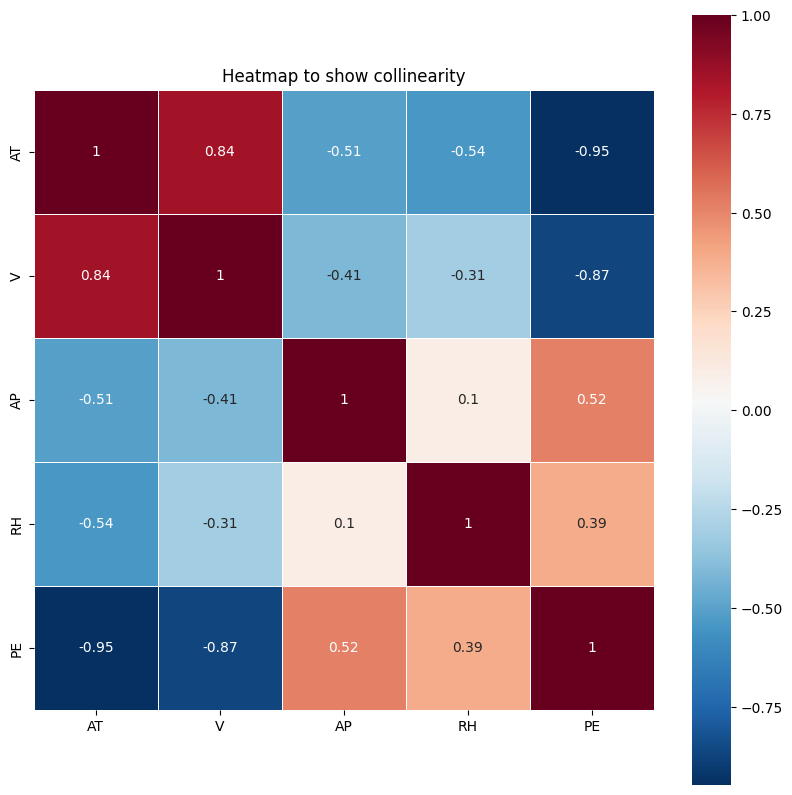

In [6]:
#Code to determine correlation between features
plt.figure(figsize=(10,10))
plt.title("Heatmap to show collinearity")
cm = ccpp_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

The heatmap visualizes the correlation between different features in the CCPP dataset, including the target variable 'PE' (Electrical Energy Output). Here's a breakdown of the observations:

Strong Positive Correlation:

AT (Ambient Temperature) and PE (Electrical Energy Output): These variables have a strong negative correlation (approximately -0.95). This suggests that as ambient temperature increases, electrical energy output tends to decrease.
V (Exhaust Vacuum) and PE (Electrical Energy Output): There is a notable negative correlation (around -0.87) between these variables. This implies that as exhaust vacuum increases, electrical energy output tends to decrease.
Moderate Correlation:

AP (Ambient Pressure) and PE (Electrical Energy Output): These variables show a moderate positive correlation (approximately 0.52), indicating a tendency for electrical energy output to increase slightly with increasing ambient pressure.
RH (Relative Humidity) and PE (Electrical Energy Output): A weak positive correlation (around 0.39) exists between these variables. This suggests a slight tendency for electrical energy output to increase with increasing relative humidity.
Collinearity:

AT (Ambient Temperature) and V (Exhaust Vacuum): These features have a moderate positive correlation of roughly 0.84. This is an example of collinearity where two predictor variables are correlated with each other. In some models, this multicollinearity can be problematic as it can affect the stability and interpretability of the model coefficients.
Overall:

The heatmap effectively illustrates the relationships between different features in the dataset. It highlights the strong influence of ambient temperature (AT) and exhaust vacuum (V) on electrical energy output (PE). Additionally, it identifies potential collinearity between AT and V, which is something to consider during model building and analysis.


In [7]:
regr = SGDRegressor(random_state=0)
regr.fit(X_train, y_train)

SGDRegressor(random_state=0)

In [ ]:
y_pred = regr.predict(X_test)

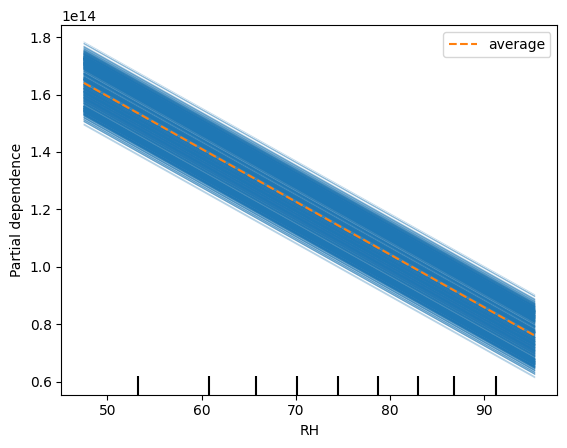

In [ ]:
# Choose the feature of interest
features = ["RH"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='both') #kind='both'

A downward slope in a partial dependence plot (PDP) indicates a negative relationship between the feature and the target variable. In this case, as the “RH” (relative humidity) increases, the predicted value of the target variable decreases. This suggests that higher values of “RH” are associated with lower values of the target, according to the model being analyzed.

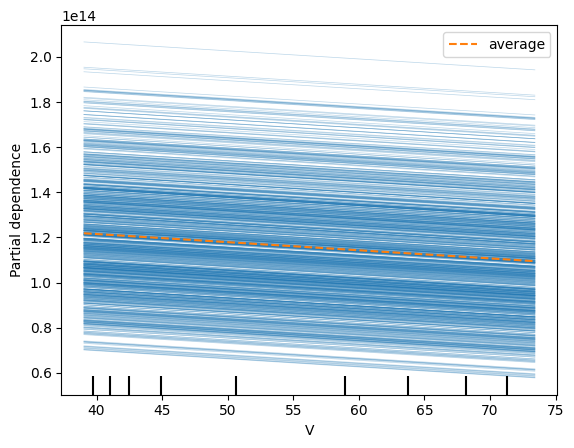

In [ ]:
# Choose the feature of interest
features = ["V"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='both') #kind='both'

A relitevely flat line with minor downward slope in a partial dependence plot (PDP) indicates a very minor negative relationship between the feature and the target variable. In this case, as the "V" increases, the predicted value of the target variable decreases ever so slightly. This suggests that V does not have a big impact on the target variable.

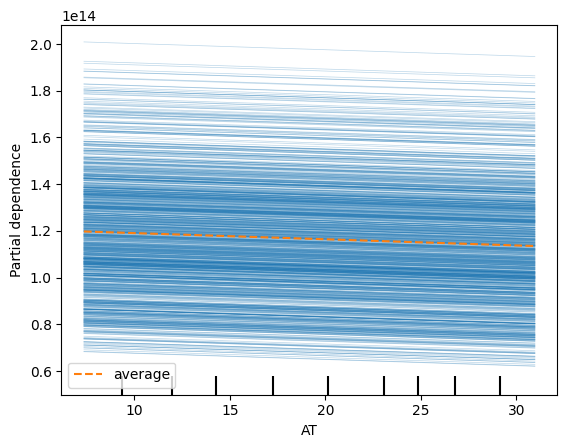

In [ ]:
# Choose the feature of interest
features = ["AT"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='both') #kind='both'

A relitevely flat line with minor downward slope in a partial dependence plot (PDP) indicates a very minor negative relationship between the feature and the target variable. In this case, as the "AT" increases, the predicted value of the target variable decreases ever so slightly. This suggests that AT does not have a big impact on the target variable.

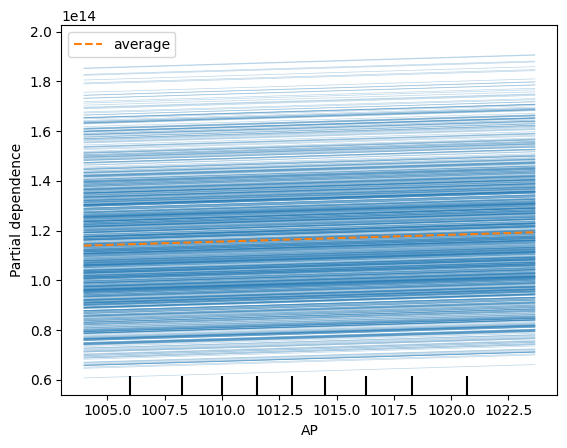

In [ ]:
# Choose the feature of interest
features = ["AP"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='both') #kind='both'

A relitevely flat line with minor upward slope in a partial dependence plot (PDP) indicates a very minor positive relationship between the feature and the target variable. In this case, as the "AP" increases, the predicted value of the target variable decreases ever so slightly. This suggests that AP does not have a big impact on the target variable.

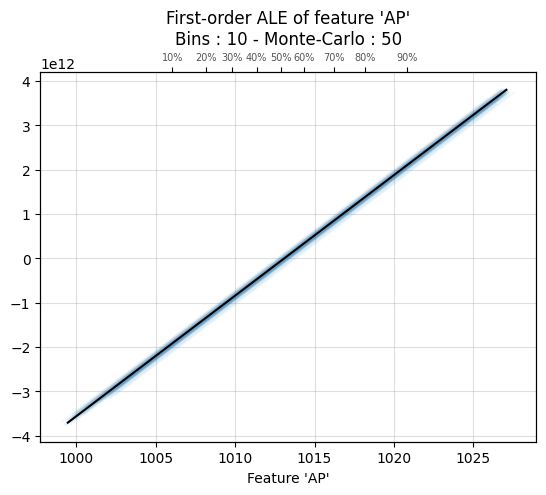

<Axes: title={'center': "First-order ALE of feature 'AP'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'AP'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(regr, X_train, 'AP', monte_carlo=True)

Since this line has a very steep slope in the positive direction it means the feature AP, has a high positive effect on predictions in the positive direction.

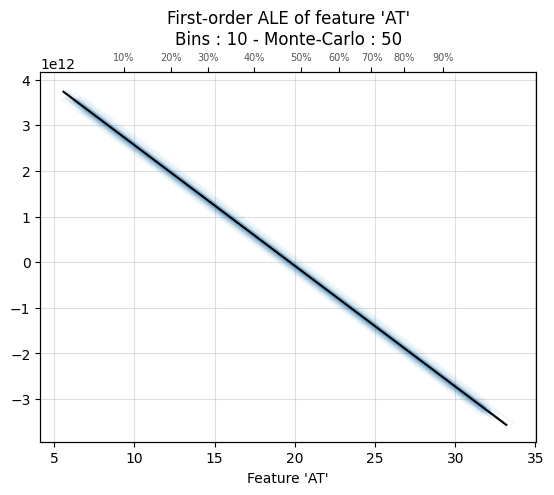

<Axes: title={'center': "First-order ALE of feature 'AT'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'AT'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(regr, X_train, 'AT', monte_carlo=True)

Since this line has a very steep slope in the negative direction it means the feature AT, has a high negative effect on predictions in the negative direction.

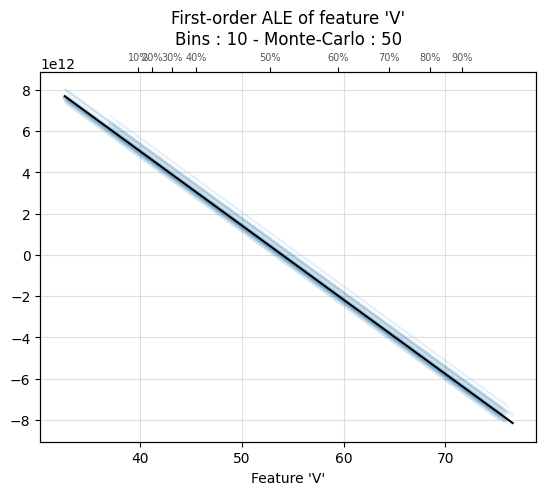

<Axes: title={'center': "First-order ALE of feature 'V'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'V'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(regr, X_train, 'V', monte_carlo=True)

Since this line has a very steep slope in the negative direction it means the feature V, has a high negative effect on predictions in the negative direction.

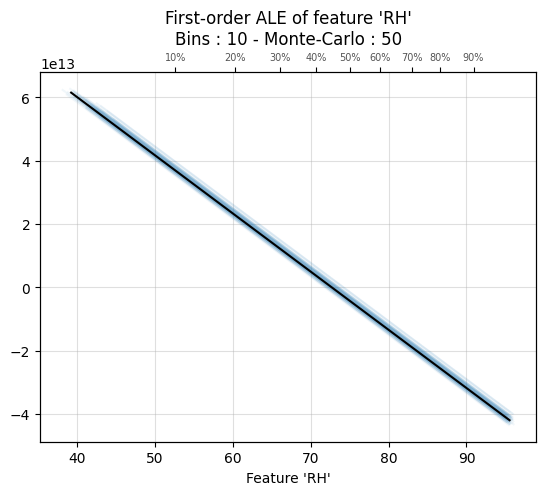

<Axes: title={'center': "First-order ALE of feature 'RH'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'RH'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(regr, X_train, 'RH', monte_carlo=True)

Since this line has a very steep slope in the negative direction it means the feature RH, has a high negative effect on predictions in the negative direction.

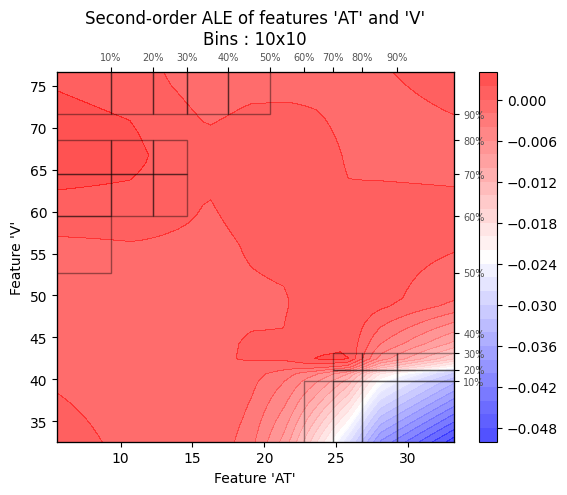

<Axes: title={'center': "Second-order ALE of features 'AT' and 'V'\nBins : 10x10"}, xlabel="Feature 'AT'", ylabel="Feature 'V'">

In [ ]:
# 2D Second-Order ALE Plot
ale_plot(regr, X_train, X_train.columns[:2], bins=10)

We can see the surface is relitvely flat through the entire landscape. however we do notice 3 distinct lighter shades of red on the graph indicating some negative correlation of these features on the predicted variable. The blue on the bottom indicates a much higher negative correlation with the target variable.

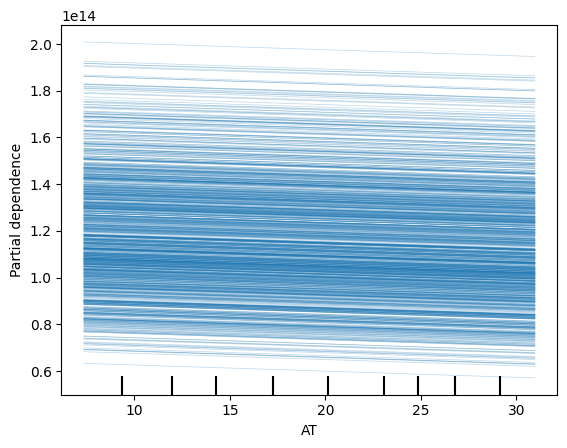

In [ ]:
# Choose the feature of interest
features = ["AT"]

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='individual') #kind='individual'

A relitevely flat line with minor downward slope in a ICE plot indicates a very minor negative relationship between the feature and the target variable. In this case, as the "AT" increases, the predicted value of the target variable decreases ever so slightly. This suggests that AT does not have a big impact on the target variable.

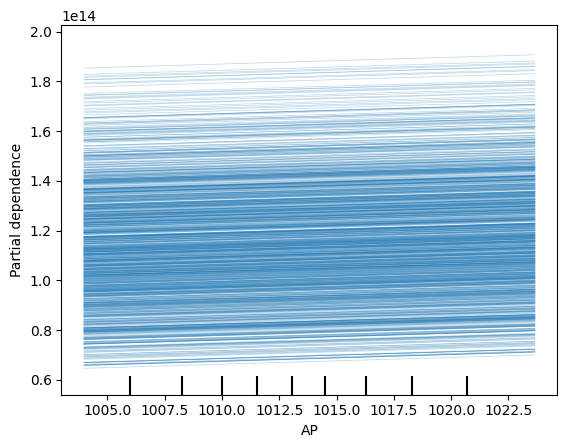

In [ ]:
# Choose the feature of interest
features = ["AP"]

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='individual') #kind='individual'

A relitevely flat line with minor upward slope in a ICE plot indicates a very minor positive relationship between the feature and the target variable. In this case, as the "AP" increases, the predicted value of the target variable decreases ever so slightly. This suggests that AP does not have a big impact on the target variable.

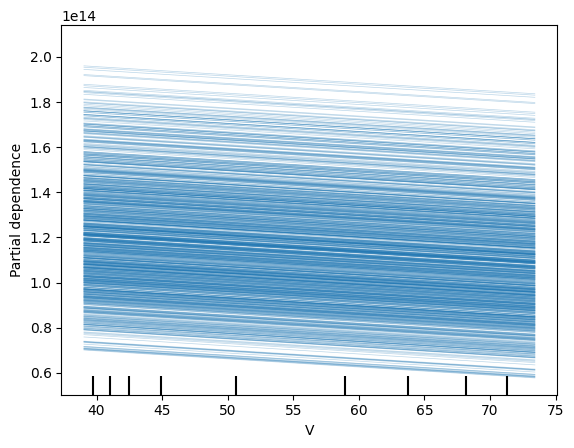

In [ ]:
# Choose the feature of interest
features = ["V"]

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='individual') #kind='individual'

A relitevely flat line with minor downward slope in a ICE plot indicates a very minor negative relationship between the feature and the target variable. In this case, as the "V" increases, the predicted value of the target variable decreases ever so slightly. This suggests that V does not have a big impact on the target variable.

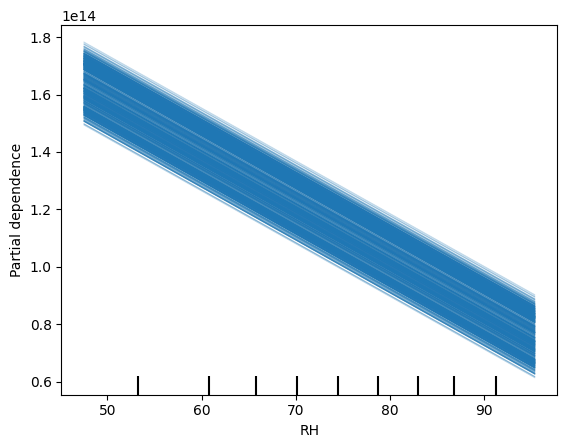

In [ ]:
# Choose the feature of interest
features = ["RH"]

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(regr, X_test, features, kind='individual') #kind='individual'

A downward slope in a ICE plot indicates a negative relationship between the feature and the target variable. In this case, as the “RH” (relative humidity) increases, the predicted value of the target variable decreases. This suggests that higher values of “RH” are associated with lower values of the target, according to the model being analyzed.